# Web Scraping Data Indeks Standar Pencemaran Udara (ISPU) di Stasiun Pemantau Kualitas Udara (SPKU) DKI JAKARTA Tahun 2010 -2021
---

Created by : Diaz Jubairy Prabowo  
Source : https://data.jakarta.go.id
___

### CONTENTS :
- Data Preparation
    - Mengatur Direktori Kerja Folder yang akan digunakan
    - Melakukan Web Scraping
    - Menyamakan format penulisan nama file
    - Menggabungkan Semua File .csv
    - Membaca file .csv Gabungan

In [21]:
import os
import pandas as pd
import numpy as np

# Data Preparation
## Mengatur Direktori Kerja Folder yang akan digunakan

In [3]:
# mengecek direktori file yang saat ini digunakan

print("Current Working Directory " , os.getcwd())

Current Working Directory  C:\Users\Diaz\EDA ISPU JAKARTA


In [8]:
# mengubah direktori file yang akan digunakan
# catatan : gunakan pemisah '/'

change_directory = "C:/Users/Diaz/Documents"

os.chdir(change_directory)
print("Current Working directory has been changed to :", change_directory)

Current Working directory has been changed to : C:/Users/Diaz/Documents


In [11]:
# membuat file direktori baru untuk menampung file yang akan discrapping

os.makedirs("Project Data ISPU SPKU DKI JAKARTA 2010 - 2021", exist_ok=False)

In [13]:
# mengubah direktori file ke folder yang baru dibuat

change_directory = "C:/Users/Diaz/Documents/Project Data ISPU SPKU DKI JAKARTA 2010 - 2021"

os.chdir(change_directory)
print("Current Working directory has been changed to :", change_directory)

Current Working directory has been changed to : C:/Users/Diaz/Documents/Project Data ISPU SPKU DKI JAKARTA 2010 - 2021


## Melakukan Web Scraping

In [20]:
# melakukan web scraping dengan melakukan parsing web html untuk mendapatkan banyak link yang berisi file .csv
# dari parent link yang dimasukan ke list URLS, akan didapatkan link file .csv lalu 
# mengunduh banyak file .csv pada masing-masing parent link
# lalu akan dibuat folder untuk tiap parent link, file .csv akan dimasukan dikelompokan berdasarkan tahun pada parent link
# dilakukan menggunakan library requests dan BeautifulSoup

import requests
from bs4 import BeautifulSoup


URLS = [ 'https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2010',
         'https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2011',
         'https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2012',
         'https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2013',
         'https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2014',
         'https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2015',
         'https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2016',
         'https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2017',
         'https://data.jakarta.go.id/dataset/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-tahun-2018',
         'https://data.jakarta.go.id/dataset/data-indeks-standar-pencemar-udara-ispu-di-provinsi-dki-jakarta-tahun-2019',
         'https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2020',
         'https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2021'
       ] 


for url in URLS:
    soup = BeautifulSoup(requests.get(url).content, "html.parser")

    folder = url.split("/")[-1]
    os.makedirs(folder, exist_ok=True)

    for a in soup.select('a[href$=".csv"]'):
        file_name = a["href"].split("/")[-1]
    

        print(
           "Downloading {} ...".format(os.path.join(folder, file_name)),
            end=" ",
        )
        with open(os.path.join(folder, file_name), "wb") as f_out:
            f_out.write(requests.get(a["href"]).content)
        print("OK.")

## Menyamakan format penulisan nama file
karena link pada tahun 2018 dan 2019 berbeda format penamaan dengan link lainnya, kita ubah nama foldernya mengikuti standar penamaan yang sama terlebih dahulu secara manual di direktori kerja `C:/Users/Diaz/Documents/Project Data ISPU SPKU DKI JAKARTA 2010 - 2021`

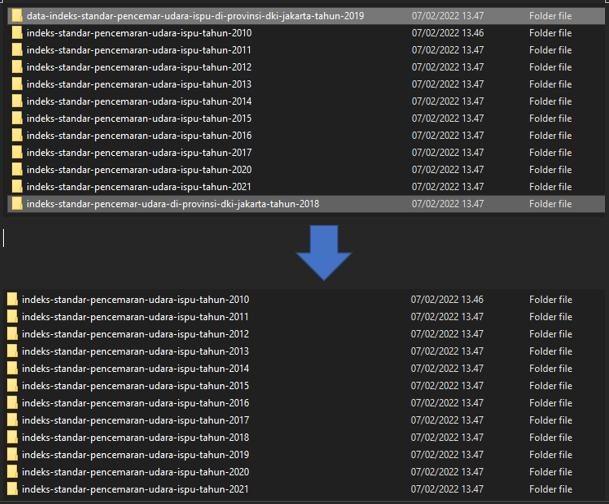

## Menggabungkan semua file .csv Indeks-Standar-Pencemar-Udara-di-SPKU dari tahun 2010 sampai 2021

di dalam masing-masing folder `indeks-standar-pencemaran-Udara-ispu-tahun-....` terdapat 24 file .csv yang terbagi menjadi 2 kelompok :
- kelompok pertama adalah `Indeks-Standar-Pencemar-Udara-di-SPKU-Bulan-....-Tahun-....`
- kelompok kedua adalah `Indeks-Standar-Pencemar-Udara-di-Provinsi-DKI-Jakarta-Bulan-N....-Tahun-....`

masing-masing kelompok memiliki 12 file dari bulan Januari sampai Desember, jadi totalnya ada 24 file .csv di dalam satu folder `indeks-standar-pencemaran-Udara-ispu-tahun-....`, kita akan menggunakan data pada kelompok pertama, yaitu data `Indeks-Standar-Pencemar-Udara-di-SPKU-Bulan-Juni-Tahun-....` karena lebih lengkap dan detail untuk masing-masing SPKU (terdapat 5 SPKU), data pada kelompok kedua adalah data untuk provinsi DKI Jakarta yang sudah digabung dari berbagai SPKU dijadikan satu bulan sehingga hanya terdapat 28 - 31 data points, dibandingkan dengan data SPKU yang lebih detail untuk masing-masing SPKU selama satu bulan yang bisa mencapai 150an data points dalam sebulan untuk 5 SPKU.

kita akan pindahkan file-file dengan nama `Indeks-Standar-Pencemar-Udara-di-SPKU-Bulan-....-Tahun-....` dari tiap-tiap folder `indeks-standar-pencemaran-Udara-ispu-tahun-....` ke dalam satu folder untuk digabung menjadi satu file .csv

In [24]:
# buat folder untuk menampung file .csv gabungan

os.makedirs("File Gabungan ISPU di SPKU 2010 - 2021", exist_ok=False)

kita pindahkan atau copy terlebih dahulu secara manual file-file dengan nama `Indeks-Standar-Pencemar-Udara-di-SPKU-Bulan-....-Tahun-....` dari tiap-tiap folder `indeks-standar-pencemaran-Udara-ispu-tahun-....` ke dalam folder `File Gabungan ISPU di SPKU 2010 - 2021`

*catatan, pada tahun 2021 hanya terdapat 10 data file .csv dari bulan Januari 2021 sampai bulan Oktober 2021

In [31]:
# mengubah working direktori ke folder 'File Gabungan ISPU di SPKU 2010 - 2021'
change_directory = "C:/Users/Diaz/Documents/Project Data ISPU SPKU DKI JAKARTA 2010 - 2021/File Gabungan ISPU di SPKU 2010 - 2021"

os.chdir(change_directory)
print("Current Working directory has been changed to :", change_directory)

# menggabungkan semua file .csv di folder 'File Gabungan ISPU di SPKU 2010 - 2021' menjadi satu file .csv
master_df = pd.DataFrame()

for file in os.listdir(os.getcwd()):
    if file.endswith('.csv'):
        master_df = master_df.append(pd.read_csv(file))
 
master_df.to_csv('master_file_ispu.csv', index=False)
print("all .csv files has been merged")

Current Working directory has been changed to : C:/Users/Diaz/Documents/Project Data ISPU SPKU DKI JAKARTA 2010 - 2021/File Gabungan ISPU di SPKU 2010 - 2021
all .csv files has been merged


semua file .csv di dalam folder `File Gabungan ISPU di SPKU 2010 - 2021` sudh digabung menjadi satu file .csv bernama `master_file_ispu.csv`

In [35]:
# membaca file yang gabungan 'master_file_ispu.csv' dalam bentuk pandas dataframe

df = pd.read_csv('master_file_ispu.csv')
df

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,kategori
0,2010-08-01,DKI1 (Bunderan HI),48,12,19,47,25,48.0,PM10,BAIK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-08-02,DKI1 (Bunderan HI),57,15,36,57,29,57.0,PM10,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-08-03,DKI1 (Bunderan HI),61,13,31,48,17,61.0,PM10,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-08-04,DKI1 (Bunderan HI),---,---,---,---,---,0.0,NaN,TIDAK ADA DATA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-08-05,DKI1 (Bunderan HI),76,16,---,56,26,76.0,PM10,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21810,2021-09-26,DKI5 (Kebon Jeruk) Jakarta Barat,48,---,4,30,9,67,PM25,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21811,2021-09-27,DKI5 (Kebon Jeruk) Jakarta Barat,51,---,9,22,18,78,PM25,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21812,2021-09-28,DKI5 (Kebon Jeruk) Jakarta Barat,42,---,5,26,14,64,PM25,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21813,2021-09-29,DKI5 (Kebon Jeruk) Jakarta Barat,56,---,11,34,19,87,PM25,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


terlihat bahwa data sudah tergabung menjadi satu hanya saja data belum bersih dan masih berantakan atau acak tidak berututan (data timeseries harus berurutan), terjadi penambahan banyak kolom kosong dan perlu dilakukan eksplorasi lebih lanjut hal-hal apa saja yang perlu dilakukan agar data mejadi bersih dan siap pakai.

selanjutnya akan dilakukan proses data cleansing agar data menjadi bersih, terstruktur, urut, dan terformat sesuai dengan data yang seharusnya sehingga data siap dipakai untuk dianalisis atau dibuat visualisasi data.